In [2]:
# Problem 1 - Naive Bayes Binary Classification
    # compute prediction accuracy

import pandas
from sklearn.model_selection import train_test_split
from sklearn import metrics

card_data=pandas.read_csv(r'C:\Users\saedw\OneDrive\Desktop\STAT 574 Data Mining\HW1STAT574S23\DATA SETS\card_transdata.csv')
X=card_data.iloc[:,0:7].values
y=card_data.iloc[:,7]

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=9994445)
 
#FITTING NAIVE BAYES BINARY CLASSIFIER 
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
gauss_nb.fit(X_train, y_train)
  
#COMPUTING PREDICTION ACCURACY FOR TESTING DATA 
y_pred = gauss_nb.predict(X_test)
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred)*100, 2),'%')

Accuracy: 53.75 %


In [6]:
# Problem 2 - Naive Bayes Multinomial Classification
 # compute prediction accuracy 

import pandas
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean
from sklearn.metrics import accuracy_score

concussion_data=pandas.read_csv(r'C:\Users\saedw\OneDrive\Desktop\STAT 574 Data Mining\HW1STAT574S23\DATA SETS\concussions_data.csv')

code_position={'Offensive Lineman': 1, 'Cornerback': 2, 'Running Back': 3,'Wide Receiver': 4,
'Quarterback': 5}
code_concussion={'mild': 1, 'moderate': 2, 'severe': 3}

concussion_data['position']=concussion_data['position'].map(code_position)
concussion_data['concussion']=concussion_data['concussion'].map(code_concussion)

X=concussion_data.iloc[:,0:4]
y=concussion_data.iloc[:,4]


#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=457752)

#FITTING NAIVE BAYES BINARY CLASSIFIER 
gnb=GaussianNB()
gnb.fit(X_train, y_train)
  

#COMPUTING PREDICTION ACCURACY FOR TESTING DATA
y_pred=gnb.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.9333333333333333


24/24 [==============================] - 0s 565us/step
accuracy within 10% = 0
accuracy within 15% = 0
accuracy within 20% = 0


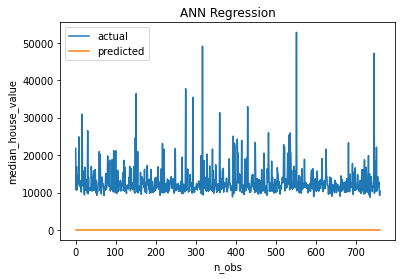

In [12]:
# Problem 3 - Artificial Nueral Network Regression
 # plot actual and predicted values - compute prediction accuracy w/in 10%, 15% & 20%

import numpy
import pandas
from statistics import mean

# read in data
hospital=pandas.read_csv(r'C:\Users\saedw\OneDrive\Desktop\STAT 574 Data Mining\HW1STAT574S23\DATA SETS\hospital_data.csv')
coding={'M': 1, 'F': 0}
hospital['gender']=hospital['gender'].map(coding)

#SCALING VARIABLES TO FALL IN [0,1]
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
scaler_fit=scaler.fit_transform(hospital)
scaled_housing_data=pandas.DataFrame(scaler_fit, columns=hospital.columns)

X=hospital.iloc[:,1:6].values
y=hospital.iloc[:,6].values

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=7950321)

#FITTING AN ARTIFICIAL NEURAL NETWORK
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
 
#Defining the input layer and one hidden layer
model.add(Dense(units=3, input_dim=5, kernel_initializer='uniform', 
activation='tanh'))

#Defining the output neuron
model.add(Dense(1))
 
#Compiling the model
model.compile(loss='mean_squared_error')
 
#Fitting the ANN to the training set
model.fit(X_train, y_train)

#COMPUTING PREDICTION ACCURACY FOR TESTING DATA
y_pred=model.predict(X_test)

ind10=[]
ind15=[]
ind20=[]     

for sub1, sub2 in zip(y_pred, y_test):
    ind10.append(1) if abs(sub1-sub2)<0.10*sub2 else ind10.append(0)
    ind15.append(1) if abs(sub1-sub2)<0.15*sub2 else ind15.append(0)
    ind20.append(1) if abs(sub1-sub2)<0.20*sub2 else ind20.append(0)
 
#accuracy within 10%
accuracy10=mean(ind10)
print('accuracy within 10% =', accuracy10)

#accuracy within 15%
accuracy15=mean(ind15)
print('accuracy within 15% =', accuracy15)

#accuracy within 20%
accuracy20=mean(ind20)
print('accuracy within 20% =', accuracy20)


#plotting actual and predicted obsevations vs. observation number
import matplotlib.pyplot as plt
  
n_obs=list(range(0,len(y_test)))
plt.plot(n_obs, y_test, label="actual")
plt.plot(n_obs, y_pred, label="predicted")
plt.xlabel('n_obs')
plt.ylabel('median_house_value')
plt.title('ANN Regression')
plt.legend()
plt.show()



In [13]:
# Problem 4 - ANN binary
 # compute prediction accuracy 

import numpy
import pandas
from sklearn.model_selection import train_test_split

card_data=pandas.read_csv(r'C:\Users\saedw\OneDrive\Desktop\STAT 574 Data Mining\HW1STAT574S23\DATA SETS\card_transdata.csv')

#SCALING VARIABLES TO FALL IN [0,1]
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
scaler_fit=scaler.fit_transform(card_data)
scaled_pneumonia_data=pandas.DataFrame(scaler_fit, columns=card_data.columns)

X=card_data.iloc[:,0:7].values
y=card_data.iloc[:,7]

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=505606)

#FITTING AN ARTIFICIAL NEURAL NETWORK
import keras
from keras.models import Sequential
from keras.layers import Dense

biclassifier=Sequential()

#Defining the input layer and first hidden layer
biclassifier.add(Dense(units=3, activation='sigmoid'))

#Defining the output neuron
biclassifier.add(Dense(1))
 
#Compiling the model
biclassifier.compile(loss='binary_crossentropy')
 
#Fitting the ANN to the training set
biclassifier.fit(X_train, y_train)

#COMPUTING PREDICTION ACCURACY FOR TESTING DATA
y_pred=numpy.round(biclassifier.predict(X_test),0) #predicted probability of 1

from sklearn import metrics
print('Accuracy:', round(metrics.accuracy_score(y_test, y_pred)*100, 2),'%')



13/13 [==============================] - 0s 483us/step
Accuracy: 90.25 %


In [16]:
# Problem 5 - ANN multinomial 
    # compute prediction accuracy 
import numpy
import pandas
from sklearn.model_selection import train_test_split
from statistics import mean

concussion_data=pandas.read_csv(r'C:\Users\saedw\OneDrive\Desktop\STAT 574 Data Mining\HW1STAT574S23\DATA SETS\concussions_data.csv')

code_position={'Offensive Lineman': 1, 'Cornerback': 2, 'Running Back': 3,'Wide Receiver': 4,
'Quarterback': 5}
code_concussion={'mild': 1, 'moderate': 2, 'severe': 3}

concussion_data['position']=concussion_data['position'].map(code_position)
concussion_data['concussion']=concussion_data['concussion'].map(code_concussion)

#SCALING VARIABLES TO FALL IN [0,1]
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
scaler_fit=scaler.fit_transform(concussion_data)
scaled_movie_data=pandas.DataFrame(scaler_fit, columns=concussion_data.columns)

X=concussion_data.iloc[:,0:4]
y=concussion_data.iloc[:,4:8]

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=116008)

y_train=y_train[:,1:4]
y_true=y_test[:,0]
y_test=y_test[:,1:4]

#FITTING AN ARTIFICIAL NEURAL NETWORK
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow 
tensorflow.random.set_seed(454545)

multiclassifier=Sequential()

#Defining one hidden layer
multiclassifier.add(Dense(units=2, activation='sigmoid'))

#Defining the output neuron
multiclassifier.add(Dense(units=3, activation='tanh'))
 
#Compiling the model
multiclassifier.compile(loss='categorical_crossentropy')
 
#Fitting the ANN to the training set
multiclassifier.fit(X_train, y_train)

#COMPUTING PREDICTION ACCURACY FOR TESTING DATA
pred_prob=pandas.DataFrame(multiclassifier.predict(X_test))

y_pred=0.25*pred_prob.idxmax(axis=1)

match=[]
for i in range(len(y_pred)):
    if y_pred[i]==y_true[i]: 
        match.append(1)
    else:
        match.append(0)
        
print('accuracy=', round(mean(match),4))





InvalidIndexError: (slice(None, None, None), slice(1, 4, None))